In [1]:
from ddrnet_23_slim import DualResNet as DualResNet_tens
from DDRNet_23_slim_official import DualResNet_imagenet_off
from pretrained_model_mapping import set_weight
from comparison_test import test
import torch
import numpy as np
import keras
import tensorflow as tf
from comparison_test import test

In [2]:
net = DualResNet_imagenet_off(pretrained=True)
weight_net = net.state_dict()
torch_model = net.eval()

In [4]:
model= DualResNet_tens((224, 224, 3), 3, 19, comparison_test=True)
set_weight(model, path='DDRNet23s_imagenet.pth', 
           test=True, random_weight=weight_net)

In [33]:
torch_model = torch_model.eval()
  
torch_inputs = torch.Tensor(np.random.rand(1, 3, 224, 224))

tf_inputs = np.transpose(torch_inputs.numpy(), (0, 2, 3, 1))
with torch.no_grad():
    torch_output = torch_model(torch_inputs)

tf_output = model.predict(tf_inputs)

ValueError: in user code:

    File "c:\users\danis\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "c:\users\danis\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\danis\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "c:\users\danis\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "c:\users\danis\appdata\local\programs\python\python37\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\danis\appdata\local\programs\python\python37\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_4" is incompatible with the layer: expected shape=(None, 1000, 1000, 3), found shape=(None, 224, 224, 3)


In [4]:
res = []
res_all = []

for num in [3, 6, 9, 12]:
    
    model= DualResNet_tens((224, 224, 3), num, 19, comparison_test=True)
    set_weight(model, path='DDRNet23s_imagenet.pth', 
           test=True, random_weight=weight_net)
    
    torch_inputs = torch.Tensor(np.random.rand(num, 3, 224, 224))

    tf_inputs = np.transpose(torch_inputs.numpy(), (0, 2, 3, 1))
    with torch.no_grad():
        torch_output = torch_model(torch_inputs)

    tf_output = model.predict(tf_inputs)
    
    for i in range(16):
            res.append(test(torch_output, tf_output, i))
            
    res_all.append(res)
    res = []

Max difference in conv1 is :9.5367431640625e-07 and avg is: 4.662422981027703e-08
Max difference in layer1 is :2.86102294921875e-06 and avg is: 2.2168354973928217e-07
Max difference in layer2 is :2.7120113372802734e-06 and avg is: 2.705201040953398e-07
Max difference in layer3 is :2.3543834686279297e-06 and avg is: 2.124441778050823e-07
Max difference in layer3_ is :4.5299530029296875e-06 and avg is: 4.4185628667037236e-07
Max difference in down3 is :2.726912498474121e-06 and avg is: 1.4176985985159263e-07
Max difference in copression3 is :4.887580871582031e-06 and avg is: 3.8505223187712545e-07
Max difference in layer4 is :2.5331974029541016e-06 and avg is: 2.860412848804117e-07
Max difference in layer4_ is :5.4836273193359375e-06 and avg is: 5.435290972855e-07
Max difference in down4 is :2.0265579223632812e-06 and avg is: 1.5276157228072407e-07
Max difference in compression4 is :5.9604644775390625e-06 and avg is: 4.83111932680913e-07
Max difference in layer5_ is :4.76837158203125e-06

In [22]:
res_all

[[9.536743e-07,
  2.2053719e-06,
  2.861023e-06,
  2.0563602e-06,
  3.9339066e-06,
  3.2186508e-06,
  3.9562583e-06,
  2.026558e-06,
  5.3346157e-06,
  2.0116568e-06,
  4.544854e-06,
  3.8146973e-06,
  1.5795231e-06,
  6.854534e-07,
  6.7055225e-07,
  3.1664968e-07],
 [8.34465e-07,
  2.1457672e-06,
  3.0398369e-06,
  2.8908253e-06,
  4.4107437e-06,
  2.7269125e-06,
  4.604459e-06,
  2.6524067e-06,
  7.4505806e-06,
  2.0563602e-06,
  7.4505806e-06,
  4.053116e-06,
  1.7285347e-06,
  7.599592e-07,
  7.301569e-07,
  3.1851232e-07],
 [1.0728836e-06,
  2.7418137e-06,
  3.2186508e-06,
  3.4719706e-06,
  4.142523e-06,
  3.8594007e-06,
  4.23193e-06,
  3.0398369e-06,
  6.198883e-06,
  2.5629997e-06,
  6.198883e-06,
  4.529953e-06,
  2.1010637e-06,
  7.003546e-07,
  6.7055225e-07,
  3.501773e-07],
 [1.1920929e-06,
  2.6226044e-06,
  3.2186508e-06,
  2.6226044e-06,
  4.61936e-06,
  3.33786e-06,
  5.00679e-06,
  3.2186508e-06,
  7.1525574e-06,
  2.7269125e-06,
  7.390976e-06,
  5.00679e-06,
  1.9

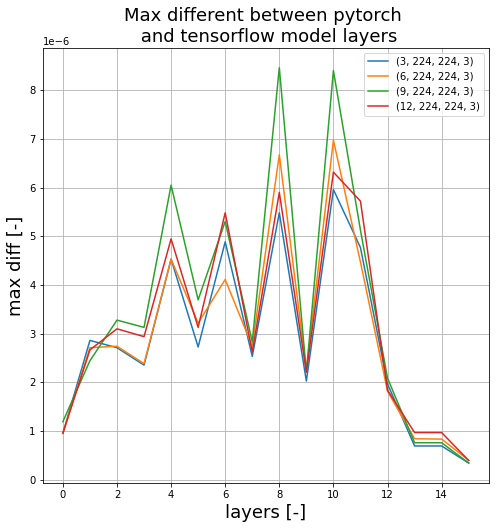

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))


plt.plot(res_all[0])
plt.plot(res_all[1])
plt.plot(res_all[2])
plt.plot(res_all[3])

plt.ylabel('max diff [-]', fontsize=18)
plt.xlabel('layers [-]', fontsize=18)
plt.title('Max different between pytorch \n and tensorflow model layers'
          , fontsize=18)
plt.grid()
plt.legend([(3, 224, 224, 3),(6, 224, 224, 3), (9, 224, 224, 3), 
            (12, 224, 224, 3)])
plt.show()